In [1]:
import numpy as np

import PIL
from PIL import ImageChops, ImageStat

from matplotlib.pyplot import imshow
%matplotlib inline

from itertools import product

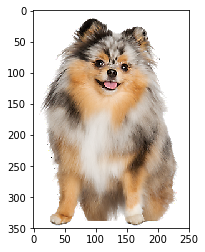

In [2]:
dog1 = PIL.Image.open('dog1.png').convert('RGB').crop((50, 0, 300, 350))
# dog1 = ImageOps.autocontrast(dog1)

imshow(dog1)

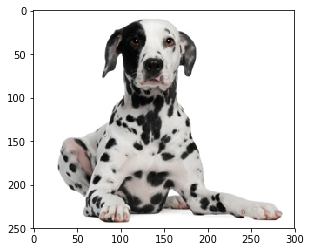

In [3]:
dog2 = PIL.Image.open('dog2.png').convert('RGB').crop((0, 35, 300, 285))

imshow(dog2)

In [4]:
def get_boxes(img, box_size=25):
    
    lx = range(0, img.size[0] + box_size, box_size)
    ly = range(0, img.size[1] + box_size, box_size)
    
    return [(tx[0], ty[0], tx[1], ty[1]) for tx, ty in product(zip(lx[:-1], lx[1:]), zip(ly[:-1], ly[1:]), repeat=True)]

# calc_boxes((75, 50))

In [5]:
def is_whitespace(im):
    return np.mean(ImageStat.Stat(im).mean) == 255

In [6]:
def get_boxes_non_blank(img, box_size):
    
    return [box for box in get_boxes(img, box_size) if not is_whitespace(img.crop(box))]

In [7]:
def calc_diff(im1, im2):
    
    return sum(ImageStat.Stat(ImageChops.difference(im1, im2)).sum2)

print(calc_diff(dog1.crop((0, 0, 25, 25)), dog2.crop((0, 0, 25, 25))))
print(calc_diff(dog1.crop((0, 0, 25, 25)), dog2.crop((75, 0, 100, 25))))

0.0
1573395.0


In [8]:
# most naive approach that can be used as a benchmark for improvements

def replace_with_closest(im1, im2, box_size=25):
    
    imo = im1.copy()
    
    boxes1 = get_boxes_non_blank(im1, box_size)
    boxes2 = get_boxes_non_blank(im2, box_size)
    
    c2s = [im2.crop(box2).rotate(deg) for box2 in boxes2 for deg in [0, 90, 180, 270]]
    
    for box1 in boxes1:
        
        c1 = im1.crop(box1)
        err_old = None
        
        for c2 in c2s:
            
            err_new = calc_diff(c1, c2)

            if (err_old is None) or (err_new < err_old):
                imo.paste(c2, box1)
                err_old = err_new
                
    return imo

Wall time: 6min 11s


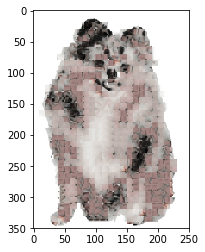

In [9]:
%%time

dog12 = replace_with_closest(dog1, dog2, 10)
        
imshow(dog12)

dog12.save('dog12.png')

Wall time: 6min 16s


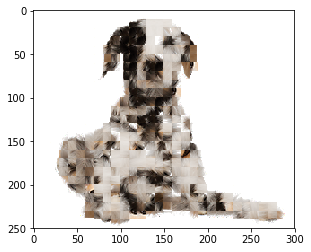

In [10]:
%%time

dog21 = replace_with_closest(dog2, dog1, 10)
        
imshow(dog21)

dog21.save('dog21.png')